In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!nvidia-smi

Thu Dec 29 15:31:19 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P0    35W /  70W |   9032MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_path = "/content/drive/MyDrive/Data"

In [ ]:
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
img_height, img_width = 254, 254
batch_size = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(
           train_path,
           subset="training",
           validation_split=0.3,
           seed=123,
           label_mode = 'categorical',
           image_size = (img_height, img_width),
            batch_size = batch_size
)


Found 1016 files belonging to 2 classes.
Using 712 files for training.


In [ ]:
img_height, img_width = 254, 254
batch_size = 32
test_data = tf.keras.preprocessing.image_dataset_from_directory(
           train_path,
           subset="validation",
           validation_split=0.3,
           seed=123,
           label_mode = 'categorical',
           image_size = (img_height, img_width),
            batch_size = batch_size
)

Found 1016 files belonging to 2 classes.
Using 304 files for validation.


In [ ]:
class_name = train_data.class_names
print(class_name)

['Covid', 'Normal']


In [ ]:
from keras.engine.sequential import Sequential
resnet_model = Sequential()
default_model = tf.keras.applications.ResNet50(
          include_top=False,
          weights='imagenet',
         input_shape=(254,254, 3),
         pooling='avg',
         classes=2)
       
for layer in default_model.layers:
          layer.trainable = False
        
resnet_model.add(default_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(2, activation='sigmoid'))

In [ ]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_3 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_4 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_5 (ModuleWra  (None, 2)                1026      
 pper)                                                           
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
__________________________________

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
result = resnet_model.fit(
           train_data,
           validation_data = test_data,
           epochs= 10
)

Epoch 1/10
23/23 [==============================] - 11s 267ms/step - loss: 0.5944 - accuracy: 0.8216 - val_loss: 0.3112 - val_accuracy: 0.8586
Epoch 2/10
23/23 [==============================] - 7s 275ms/step - loss: 0.1858 - accuracy: 0.9256 - val_loss: 0.2605 - val_accuracy: 0.8816
Epoch 3/10
23/23 [==============================] - 8s 305ms/step - loss: 0.1507 - accuracy: 0.9396 - val_loss: 0.1586 - val_accuracy: 0.9408
Epoch 4/10
23/23 [==============================] - 6s 231ms/step - loss: 0.0850 - accuracy: 0.9761 - val_loss: 0.1605 - val_accuracy: 0.9243
Epoch 5/10
23/23 [==============================] - 6s 234ms/step - loss: 0.0695 - accuracy: 0.9747 - val_loss: 0.1922 - val_accuracy: 0.9178
Epoch 6/10
23/23 [==============================] - 6s 230ms/step - loss: 0.0642 - accuracy: 0.9831 - val_loss: 0.2522 - val_accuracy: 0.8882
Epoch 7/10
23/23 [==============================] - 6s 230ms/step - loss: 0.0559 - accuracy: 0.9831 - val_loss: 0.1543 - val_accuracy: 0.9276
Epoch

In [ ]:
import matplotlib.pyplot as plt

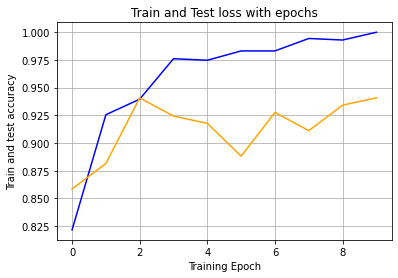

In [ ]:
plt.plot(result.history['accuracy'], color='blue', label='train')
plt.plot(result.history['val_accuracy'], color ='orange', label='train')
plt.grid(True)
plt.title("Train and Test loss with epochs")
plt.xlabel("Training Epoch")
plt.ylabel("Train and test accuracy")
plt.show()

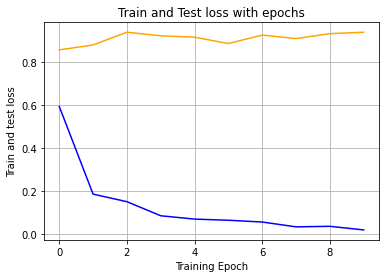

In [ ]:
plt.plot(result.history['loss'], color='blue', label='train')
plt.plot(result.history['val_accuracy'], color ='orange', label='train')
plt.grid(True)
plt.title("Train and Test loss with epochs")
plt.xlabel("Training Epoch")
plt.ylabel("Train and test loss")
plt.show()